In [1]:
## Import pandas,numpy for Dataset Manipulation and matplotlib and seaborn for Visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
import os
os.chdir("C:\\GL Class\\Industry Session\\26th Sep 2020")


In [3]:
df=pd.read_csv('glass.csv')

Columns:

* RI: refractive index
* NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
## Finding the basic measures of descriptive statistics of the continuous variables

df.iloc[:,0:8].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000


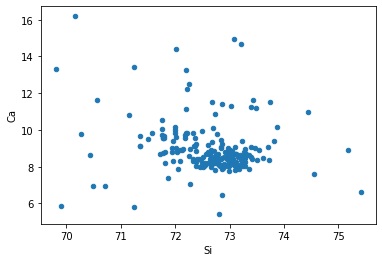

In [8]:
# Display datapoints of glass by plotting Silicon vs Calcium (Two main chemicals of glass composition)
df.plot(kind="scatter", x="Si", y="Ca") # Plot the data points (x-Si and y= Ca)
plt.show()

A FacetGrid can be drawn with up to three dimensions − row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

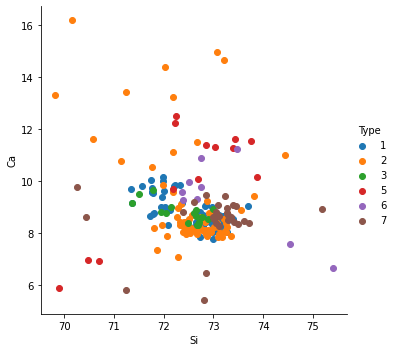

-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps


In [9]:
sns.FacetGrid(df, hue="Type", height=5).map(plt.scatter, "Si", "Ca").add_legend() 
plt.show()
print("""-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps""")

## We actually have 6 classes in the data set.. None of the records have a Class 4


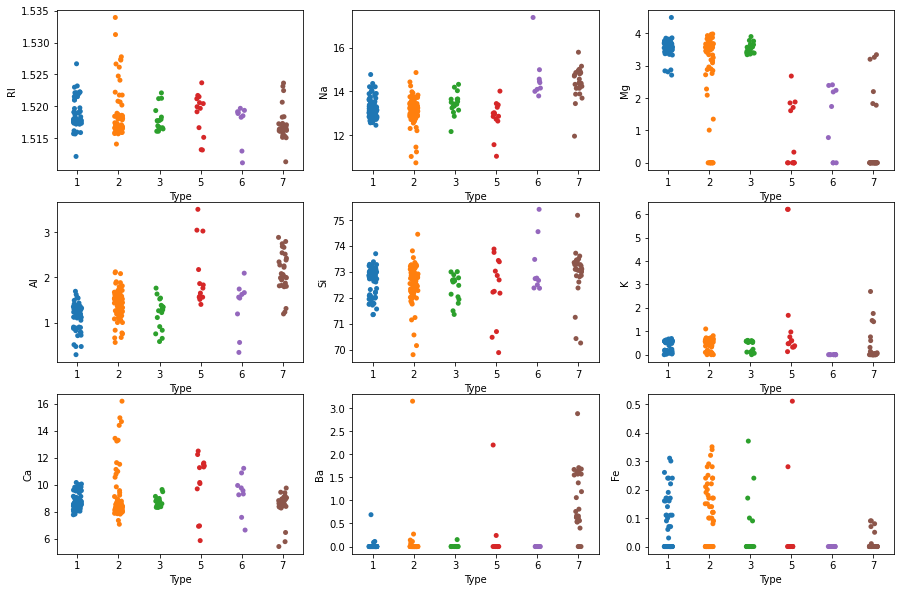

In [10]:
## Display distribution of data points of each class in each attribute
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.stripplot(x = 'Type', y = 'RI', data = df, jitter = True)
plt.subplot(3,3,2)
sns.stripplot(x = 'Type', y = 'Na', data = df, jitter = True)
plt.subplot(3,3,3)
sns.stripplot(x = 'Type', y = 'Mg', data = df, jitter = True)
plt.subplot(3,3,4)
sns.stripplot(x = 'Type', y = 'Al', data = df, jitter = True)
plt.subplot(3,3,5)
sns.stripplot(x = 'Type', y = 'Si', data = df, jitter = True)
plt.subplot(3,3,6)
sns.stripplot(x = 'Type', y = 'K', data = df, jitter = True)
plt.subplot(3,3,7)
sns.stripplot(x = 'Type', y = 'Ca', data = df, jitter = True)
plt.subplot(3,3,8)
sns.stripplot(x = 'Type', y = 'Ba', data = df, jitter = True)
plt.subplot(3,3,9)
sns.stripplot(x = 'Type', y = 'Fe', data = df, jitter = True)

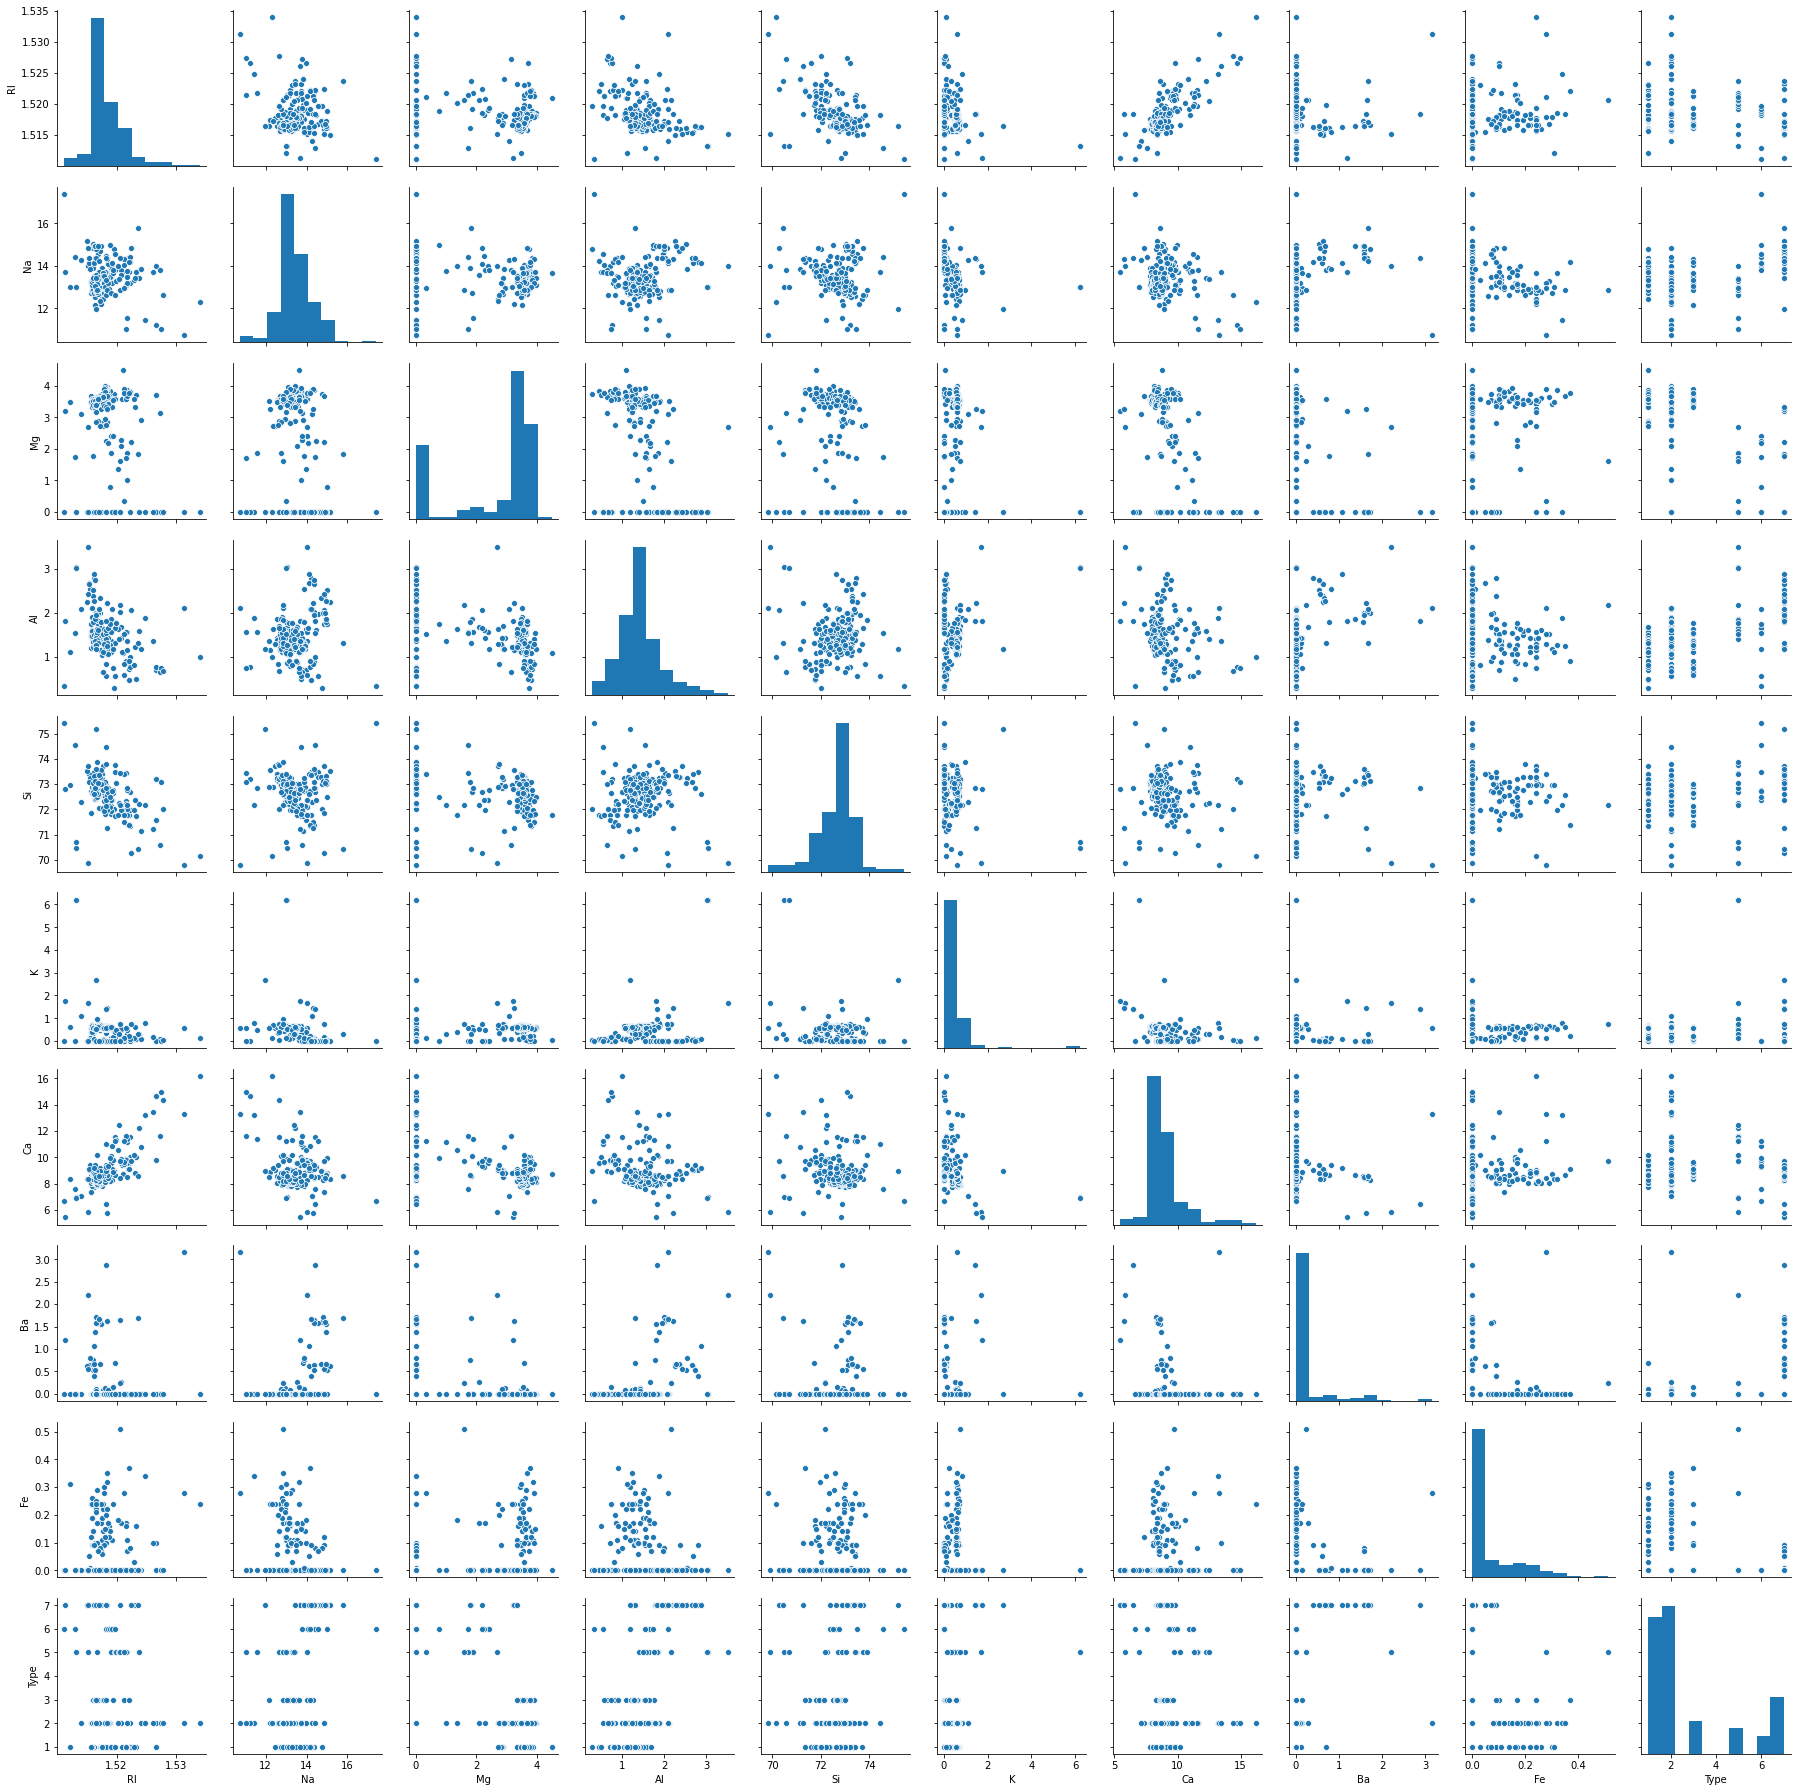

In [11]:
sns.pairplot(data=df,kind='scatter') #Shows relationships among all pairs of features

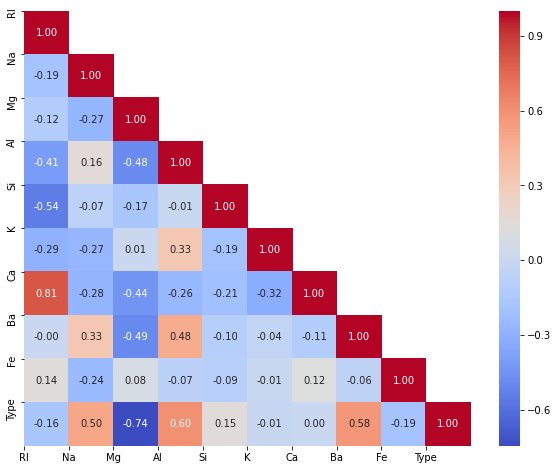

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f",mask = np.triu(corr,+1))
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

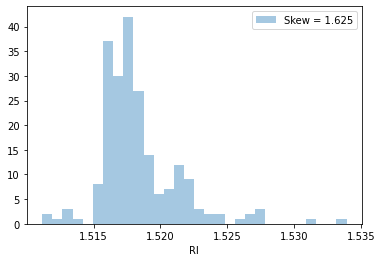

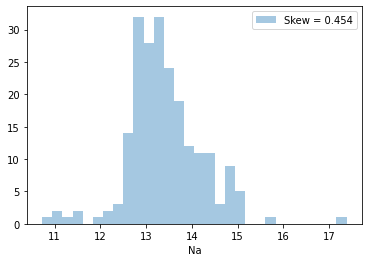

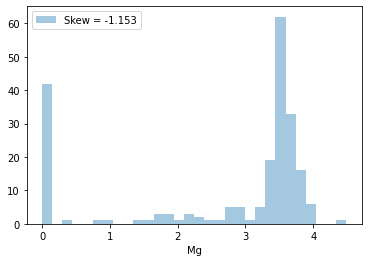

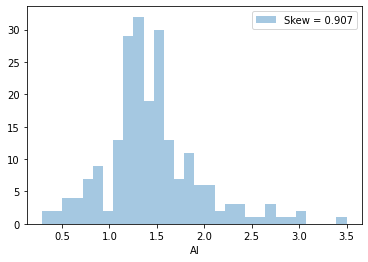

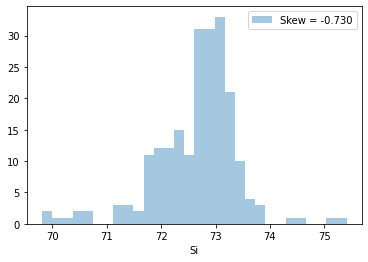

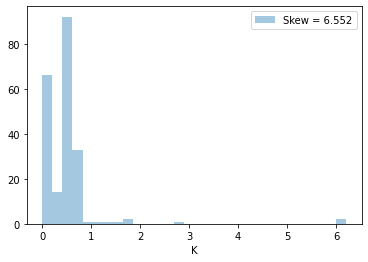

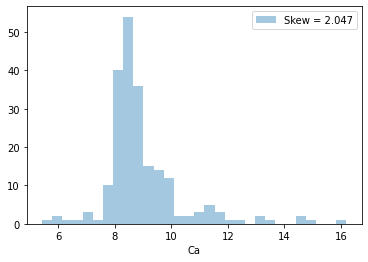

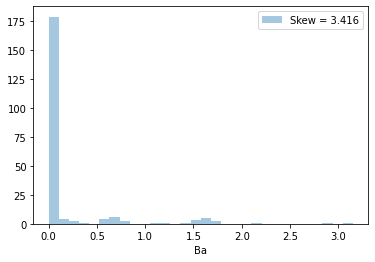

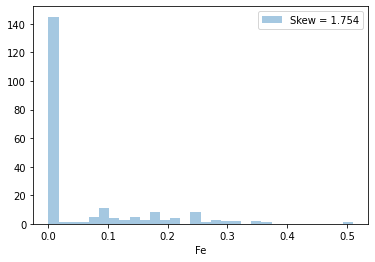

In [13]:
features = df.columns[:-1].tolist()
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features seem to be symmetrically distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers

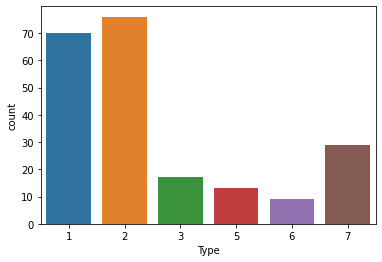

In [14]:
sns.countplot(df['Type'])
plt.show()

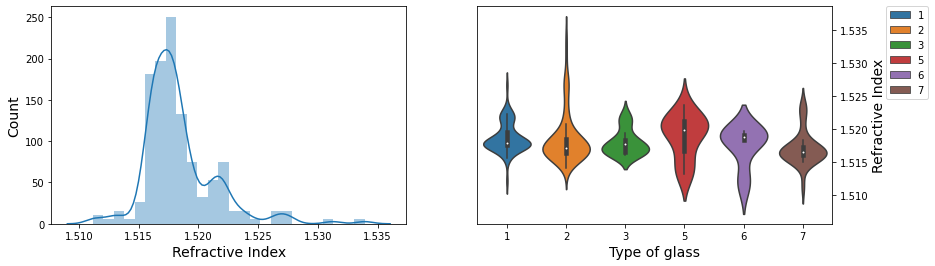

In [15]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [16]:
from collections import Counter ## A Counters is a container which keeps track to how many times equivalent values are added.

In [17]:
for col in df.columns:
    print(col)

RI
Na
Mg
Al
Si
K
Ca
Ba
Fe
Type


In [18]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
# iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   

The dataset contains 14 observations with more than 2 outliers


### Modeling with Data Preparation

In [19]:
### Prepare Data after managing outliers

outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


In [20]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (150, 9)
Shape of X_test:  (50, 9)
Shape of y_train:  (150,)
Shape of y_test (50,)


In [58]:
y_test.value_counts()


2    18
1    18
7     5
3     4
5     3
6     2
Name: Type, dtype: int64

## Naive Bayes

In [23]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
from sklearn.metrics import accuracy_score

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.6466666666666666
Test set:  0.6


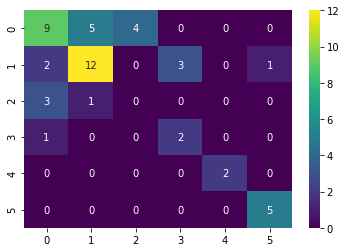

In [25]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [26]:
from sklearn import metrics

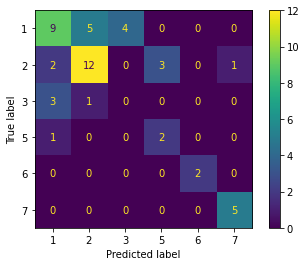

In [27]:
## Another way to plot the confusion matrix

metrics.plot_confusion_matrix(classifier_nb,X_test,y_test);

How to read the above confusion Matrix?

- 9 is True Positive 
- 5+4 is False Negative
- 2+3+! is False Positive ( For class 1)


## Difference between one vs one and one vs rest

For example consider four class problem having classes A, B, C, and D.

One vs Rest

Models classifiers_A, classifier_B, classifier_C and classifier_D During prediction here is the probability we get: classifier_A = 40% classifier_B = 30% classifier_C = 60% classifier_D = 50% We assign it class B

One vs One

We train total six classifier with subset of data containing classes involved classifier_AB classifier_AC classifier_AD classifier_BC classifier_BD classifier_CD And during classification classifier_AB assigns class A classifier_AC assigns class A classifier_AD assigns class A classifier_BC assigns class B classifier_BD assigns class D classifier_CD assigns class C We assign it to class A

In [28]:
 from sklearn.multiclass import OneVsOneClassifier

In [29]:
classifier_nb_ovo = OneVsOneClassifier(GaussianNB())
classifier_nb_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   n_jobs=None)

In [30]:
y_pred_nb_train = classifier_nb_ovo.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb_ovo.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.6466666666666666
Test set:  0.6


## Default is one vs one classification


In [31]:
from sklearn.multiclass import OneVsRestClassifier

In [32]:
classifier_nb_ovr = OneVsRestClassifier(GaussianNB())
classifier_nb_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                    n_jobs=None)

In [33]:
from sklearn.metrics import accuracy_score

y_pred_nb_train = classifier_nb_ovr.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb_ovr.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.7
Test set:  0.64


## Decision Tree Classification

## Pipeline in Python

It is used to chain multiple estimators into one and hence, automate the machine learning process. This is extremely useful as there are often a fixed sequence of steps in processing the data.

Some codes are meant to scale/standardize features.

Other codes are meant to fit algorithms like Decision Tree...

These are sequential steps .. output of the first step is used as an input for the second step.


In [34]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [35]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train)

In [36]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.82
Test set:  0.62


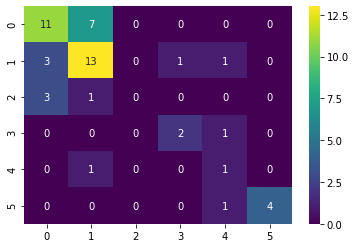

In [37]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

How to read the above confusion Matrix?

 - 11 is True Positive
 - 7 is False Negative
 - 6 is False Positive ( For class 1)


## Random Forest Classification

## RandomizedSearchCV vs.  GridSearchCV

The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. 

Both are very effective ways of tuning the parameters that increase the model generalizability.

In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [39]:
parameters =  { "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.7s finished


In [40]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)


Training set:  1.0
Test set:  0.78


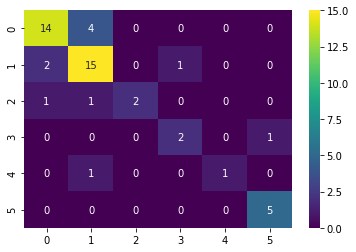

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [42]:
models = [('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test)
                   ]

In [43]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes,0.70,0.64
1,Decision Tree Classification,0.82,0.62
2,Random Forest Classification,1.00,0.78


## Classification Report

A Classification report is used to measure the quality of predictions from a classification algorithm. 

How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below. 


In [44]:
from sklearn.metrics import classification_report

In [45]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=classifier_rf.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           1   0.823529  0.777778  0.800000        18
           2   0.714286  0.833333  0.769231        18
           3   1.000000  0.500000  0.666667         4
           5   0.666667  0.666667  0.666667         3
           6   1.000000  0.500000  0.666667         2
           7   0.833333  1.000000  0.909091         5

    accuracy                       0.780000        50
   macro avg   0.839636  0.712963  0.746387        50
weighted avg   0.796947  0.780000  0.775832        50



How is the calculation done for precision

Precision = True positive/(True Positive+false Positive)= 14/17

Recall = True positive/(True Positive+false Negative)= 14/18


In [46]:
14/17

0.8235294117647058

In [47]:
14/18

0.7777777777777778

In [48]:
## F1= 2*(Precision*Recall/(Precision+Recall))

2*((.82*.78)/(.82+.78))

0.7994999999999999

### Example to understand what is LabelBinarizer

In [49]:
### Example to understand what is LabelBinarizer

from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print("Data: ", values,'\n')
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:" ,integer_encoded,'\n')

# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:\n", onehot_encoded,'\n')

#Binary encode
lb = LabelBinarizer()
print("Label Binarizer:\n", lb.fit_transform(values))

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot'] 

Label Encoder: [0 0 2 0 1 1 2 0 2 1] 

OneHot Encoder:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

Label Binarizer:
 [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


LabelEncoder – for labels(response variable) coding 1,2,3… [implies order]

OrdinalEncoder – for features coding 1,2,3 … [implies order]

Label Binarizer – for response variable, coding 0 & 1 [ creating multiple dummy columns]

OneHotEncoder - for feature variables, coding 0 & 1 [ creating multiple dummy columns]

## End of Example

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [51]:
y_pred=classifier_rf.predict(X_test)

In [52]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [53]:
multiclass_roc_auc_score(y_test, y_pred)

0.8294190799842395